<a href="https://colab.research.google.com/github/LeoGsilva0518/Learning_DataScience/blob/main/Tarefa_Trilha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Trilha 4**

Objetivo é empregar os conhecimentos aprendidos de Python para efetuar análise de Dados, utilizando bases de dados extraídas do site:
a. https://www.gapminder.org/

Foram empregadas análises exploratórias dos dados (EDA) com objetivo de responder perguntas sobre o conteúdo de informação disponível nas bases de dados.

As bases utilizadas foram, % de crescimento populacional e numero de população urbanizada, com o objetivo de explorar e entender o comportamento dos numeros anuais e quais são os países mais expressivos em ambas as bases de informações. 


# **Crescimento populacional (%) anual**
A taxa de crescimento populacional de Annuak por ano é a taxa exponencial de crescimento da população expressa em porcentagem.
A população baseia-se na definição de fato de população, que conta todos os residentes independentemente do estatuto legal ou da nacionalidade.
Fonte: https://www.gapminder.org/data/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Obtendo dados
population = pd.read_csv('https://raw.githubusercontent.com/LeoGsilva0518/Learing_DataScience/main/population_growth_annual_percent.csv')
population.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.24,1.43,0.824,0.58,0.574,0.6,0.591,0.572,0.61,...,0.378,0.503,0.583,0.591,0.541,0.503,0.472,0.459,0.437,0.428
1,Afghanistan,1.9,1.97,2.03,2.09,2.15,2.17,2.19,2.25,2.38,...,3.14,3.41,3.49,3.36,3.08,2.78,2.55,2.38,2.31,2.3
2,Angola,1.39,1.38,1.26,0.974,0.618,0.186,−0.119,−0.0427,0.548,...,3.63,3.6,3.55,3.5,3.44,3.38,3.32,3.28,3.24,3.22
3,Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.9,...,−0.269,−0.165,−0.183,−0.207,−0.291,−0.16,−0.092,−0.247,−0.426,−0.574
4,Andorra,6.97,6.73,6.47,6.25,5.98,5.78,5.52,5.28,5.19,...,−0.839,−1.59,−2.03,−1.95,−1.55,−0.899,−0.386,0.0143,0.179,0.154


In [4]:
#Verificando quantidade de campos nulos.
print(population.isnull().sum())

country    0
1960       1
1961       1
1962       1
1963       1
          ..
2015       1
2016       1
2017       1
2018       1
2019       1
Length: 61, dtype: int64


In [5]:
#Verificando a presença de N/A
population.isna()
#Existe N/A na linha 162
#Substituindo N/A por 0
population.fillna(0, inplace=True)
population.isna()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Verificando quantidade de campos nulos.
print(population.isnull().sum())

country    0
1960       0
1961       0
1962       0
1963       0
          ..
2015       0
2016       0
2017       0
2018       0
2019       0
Length: 61, dtype: int64


In [7]:
population.country

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
212           Samoa
213           Yemen
214    South Africa
215          Zambia
216        Zimbabwe
Name: country, Length: 217, dtype: object

In [8]:
#verificando a quantidade de colunas.
population.index

RangeIndex(start=0, stop=217, step=1)

In [9]:
population.dtypes

country    object
1960       object
1961       object
1962       object
1963       object
            ...  
2015       object
2016       object
2017       object
2018       object
2019       object
Length: 61, dtype: object

Os dados coletados na tabela *population* são do tipo string, sendo necessario conversão para o formato adequado para manipulação númerica.

# **Transformação dos dados na tabela Population**

Fazendo operação melt para criar uma unica coluna com todos os dados e uma unica coluna com valor da váriavel.

In [10]:
# convertar colunas em linhas 
population = pd.melt(population, id_vars = ["country"], value_vars = population.columns, var_name = "year", value_name = 'vle')
population.index

RangeIndex(start=0, stop=13020, step=1)

In [11]:
population.head()

,country,year,vle
0,Aruba,1960,2.24
1,Afghanistan,1960,1.9
2,Angola,1960,1.39
3,Albania,1960,3.12
4,Andorra,1960,6.97


In [12]:
population['vle'] = population['vle'].str.replace('−','-')

In [13]:
population.head()

,country,year,vle
0,Aruba,1960,2.24
1,Afghanistan,1960,1.9
2,Angola,1960,1.39
3,Albania,1960,3.12
4,Andorra,1960,6.97


In [14]:
population['vle'] = population['vle'].astype(float)

In [15]:
population = population.pivot("country","year","vle").reset_index()

In [16]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  217 non-null    object 
 1   1960     216 non-null    float64
 2   1961     216 non-null    float64
 3   1962     216 non-null    float64
 4   1963     216 non-null    float64
 5   1964     216 non-null    float64
 6   1965     216 non-null    float64
 7   1966     216 non-null    float64
 8   1967     216 non-null    float64
 9   1968     216 non-null    float64
 10  1969     216 non-null    float64
 11  1970     216 non-null    float64
 12  1971     216 non-null    float64
 13  1972     216 non-null    float64
 14  1973     216 non-null    float64
 15  1974     216 non-null    float64
 16  1975     216 non-null    float64
 17  1976     216 non-null    float64
 18  1977     216 non-null    float64
 19  1978     216 non-null    float64
 20  1979     216 non-null    float64
 21  1980     216 non

# **População urbana**

População urbana refere-se às pessoas que vivem em áreas urbanas conforme definido pelos institutos nacionais de estatística. Ele calculou usando estimativas de população do Banco Mundial e proporções urbanas das Perspectivas de Urbanização Mundial das Nações Unidas.

Fonte: https://www.gapminder.org/data/

In [17]:
urban=pd.read_csv('https://raw.githubusercontent.com/LeoGsilva0518/Learing_DataScience/main/urban_population.csv')
urban.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,27.5k,28.1k,28.5k,28.8k,28.9k,29.1k,29.2k,29.4k,29.6k,...,43.8k,44.1k,44.4k,44.7k,45k,45.3k,45.6k,45.9k,46.3k,46.7k
1,Afghanistan,756k,796k,839k,885k,934k,986k,1.04M,1.1M,1.16M,...,7.21M,7.53M,7.87M,8.2M,8.54M,8.85M,9.16M,9.48M,9.8M,10.1M
2,Angola,569k,597k,628k,660k,692k,722k,750k,776k,804k,...,14.7M,15.4M,16.1M,16.9M,17.7M,18.5M,19.3M,20.2M,21.1M,22M
3,Albania,494k,514k,531k,548k,565k,582k,599k,617k,636k,...,1.55M,1.58M,1.6M,1.63M,1.65M,1.68M,1.71M,1.73M,1.75M,1.76M
4,Andorra,7840,8770,9760,10.8k,11.9k,13.1k,14.3k,15.5k,16.8k,...,74.3k,73.1k,71.5k,70.1k,68.9k,68.2k,67.9k,67.8k,67.9k,67.9k


In [18]:
#Verificando quantidade de campos nulos.
print(urban.isnull().sum())

country    0
1959       1
1960       1
1961       1
1962       1
          ..
2015       1
2016       1
2017       1
2018       1
2019       1
Length: 62, dtype: int64


In [19]:
#Verificando a presença de N/A
urban.isna()
#Substituindo N/A por 0
urban.fillna(0, inplace=True)
urban.isna()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#Verificando quantidade de campos nulos.
print(urban.isnull().sum())

country    0
1959       0
1960       0
1961       0
1962       0
          ..
2015       0
2016       0
2017       0
2018       0
2019       0
Length: 62, dtype: int64


In [21]:
#verificando a quantidade de colunas.
urban.index

RangeIndex(start=0, stop=215, step=1)

In [22]:
urban.dtypes

country    object
1959       object
1960       object
1961       object
1962       object
            ...  
2015       object
2016       object
2017       object
2018       object
2019       object
Length: 62, dtype: object

Os dados coletados na tabela *Urban* são do tipo string, sendo necessario conversão para o formato adequado para manipulação númerica.

# **Transformação dos dados na tabela Urban**

# **Convertendo datatypes - Tabela Urban**



In [23]:
# convertar colunas em linhas 
urban = pd.melt(urban, id_vars = ["country"], value_vars = urban.columns, var_name = "year", value_name = 'vle')
urban.index

RangeIndex(start=0, stop=13115, step=1)

In [24]:
urban

,country,year,vle
0,Aruba,1959,27.5k
1,Afghanistan,1959,756k
2,Angola,1959,569k
3,Albania,1959,494k
4,Andorra,1959,7840
...,...,...,...
13110,Samoa,2019,35.5k
13111,Yemen,2019,11.3M
13112,South Africa,2019,39.9M
13113,Zambia,2019,8.2M


Substituíndo strings K,k,M,m,B e b por valor numerico multiplicador.

In [25]:
def valor_para_float(x):
    
    if type(x) == float or type(x) == int or type(x) == object:
        return x
#1º Definir o tipo da váriavel.
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
##2º Fez o replace para o K e k.       
    
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
###3º Fez o replace para o M e n. 
    
    if 'b' in x:
        if len(x) > 1:
            return float(x.replace('b', '')) * 1000000
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
####4º Fez o replace para o B e b.  
    else:
        return x

In [26]:
urban['vle'] = urban['vle'].apply(valor_para_float)

In [27]:
urban['vle'] = urban['vle'].astype(float)

In [28]:
urban = urban.pivot("country","year","vle").reset_index()

In [29]:
urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  215 non-null    object 
 1   1959     215 non-null    float64
 2   1960     215 non-null    float64
 3   1961     215 non-null    float64
 4   1962     215 non-null    float64
 5   1963     215 non-null    float64
 6   1964     215 non-null    float64
 7   1965     215 non-null    float64
 8   1966     215 non-null    float64
 9   1967     215 non-null    float64
 10  1968     215 non-null    float64
 11  1969     215 non-null    float64
 12  1970     215 non-null    float64
 13  1971     215 non-null    float64
 14  1972     215 non-null    float64
 15  1973     215 non-null    float64
 16  1974     215 non-null    float64
 17  1975     215 non-null    float64
 18  1976     215 non-null    float64
 19  1977     215 non-null    float64
 20  1978     215 non-null    float64
 21  1979     215 non

# Iniciando EDA

# **1.**Quais os 10 países com maior crescimento populacional em 2019?
  

In [30]:
population_2019 = population.sort_values(by=['2019'], ascending=False).head(10)

**Resposta: **1.**** Podemos observar através do gráfico que o país com maior taxa de crescimento populacional em 2019 é a Nigér, na sequência esta o Bahrain, e o 10º país com maios crescimento populacional em 2019 é a Tanzania.

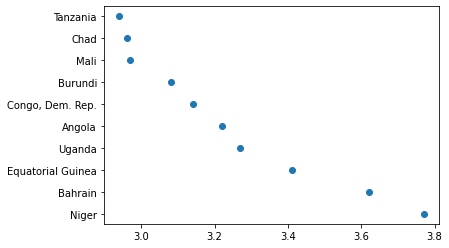

In [31]:
plt.scatter(population_2019['2019'], population_2019['country'])

# **2.**Quais os 10 países possuem a maior média de crescimeto populacional nos ultimos 10 anos? 



In [63]:
population.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object', name='year')

In [34]:
#Selecionando os 10 ultimos anos.

population_sel = population[['country','2010', '2011','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
population_sel.head()


year,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,3.140,3.410,3.4900,3.360,3.0800,2.780,2.550,2.3800,2.310,2.300
1,Albania,-0.269,-0.165,-0.1830,-0.207,-0.2910,-0.160,-0.092,-0.2470,-0.426,-0.574
2,Algeria,1.880,1.950,2.0000,2.030,2.0500,2.050,2.040,2.0100,1.930,1.840
3,American Samoa,-0.588,-0.154,0.0862,0.133,0.0269,-0.120,-0.219,-0.2810,-0.269,-0.208
4,Andorra,-0.839,-1.590,-2.0300,-1.950,-1.5500,-0.899,-0.386,0.0143,0.179,0.154


In [35]:
print(population_sel.isnull().sum())

year
country    0
2010       0
2011       1
2012       1
2013       1
2014       1
2015       1
2016       1
2017       1
2018       1
2019       1
dtype: int64


In [36]:
#Verificando a presença de N/A
population_sel.isna()
#Substituindo N/A por 0
population_sel.fillna(0, inplace=True)
population_sel.isna()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


year,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
212,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,False


In [37]:
print(population_sel.isnull().sum())

year
country    0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
dtype: int64


In [38]:
#Normalizando os dados.
population_sel = pd.melt(population_sel, id_vars = ["country"], value_vars = population_sel.columns, var_name = "year", value_name = 'Percentual')

In [39]:
population_sel

,country,year,Percentual
0,Afghanistan,2010,3.140
1,Albania,2010,-0.269
2,Algeria,2010,1.880
3,American Samoa,2010,-0.588
4,Andorra,2010,-0.839
...,...,...,...
2165,Vietnam,2019,0.905
2166,Virgin Islands (U.S.),2019,-0.356
2167,Yemen,2019,2.250
2168,Zambia,2019,2.890


In [40]:
print(population_sel.isnull().sum())

country       0
year          0
Percentual    0
dtype: int64


In [41]:
# Criando uma tabela de mediana dos ultimos 10 anos.
population_sel = pd.pivot_table(population_sel, values=['Percentual'], index=['country'],
aggfunc={'Percentual': np.mean})

In [42]:
population_sel

,Percentual
country,
Afghanistan,2.88000
Albania,-0.26140
Algeria,1.97800
American Samoa,-0.15929
Andorra,-0.88967
...,...
Vietnam,1.01030
Virgin Islands (U.S.),-0.19261
Yemen,2.53200


In [43]:
population_sel = population_sel.sort_values(by=['Percentual'], ascending=False).head(10)

In [44]:
population_sel

,Percentual
country,
Oman,5.1830
Qatar,4.3970
Equatorial Guinea,3.9650
Maldives,3.9080
Niger,3.8550
Kuwait,3.5580
Uganda,3.4400
Angola,3.4160
Jordan,3.4009


**Resposta: **2.**** Podemos ver no gráfico abaixo os 10 países com maior taxa média de crescimento populacional nos ultimos 10 anos(2010 e 2019), iniciado a lista pela Oman e finalizando a lista com o 10º país sendo o Congo, Dem. Rep.

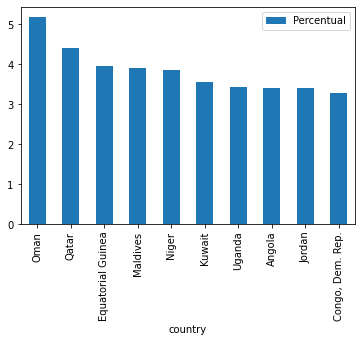

In [45]:
population_sel.plot.bar()

# **3.**O Brasil vem apresentando aumento na taxa de crescimento populacional?

In [46]:
population_Brazil = population[population.country=='Brazil']

In [47]:
population_Brazil

year,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
26,Brazil,2.91,2.92,2.91,2.87,2.81,2.75,2.69,2.64,2.58,...,0.916,0.894,0.874,0.856,0.839,0.824,0.807,0.784,0.752,0.713


In [48]:
#Normalizando os dados.
population_Brazil = pd.melt(population_Brazil, id_vars = ["country"], value_vars = population_Brazil.columns, var_name = "year", value_name = 'Percentual')

**Resposta: **3.**** Podemos ver no gráfico abaixo a taxa de crescimento do Brasil no período de 1960 á 2019, sendo esta apresentando declínio ao longo deste período.

Text(0, 0.5, 'Crescimento Pop (%)')

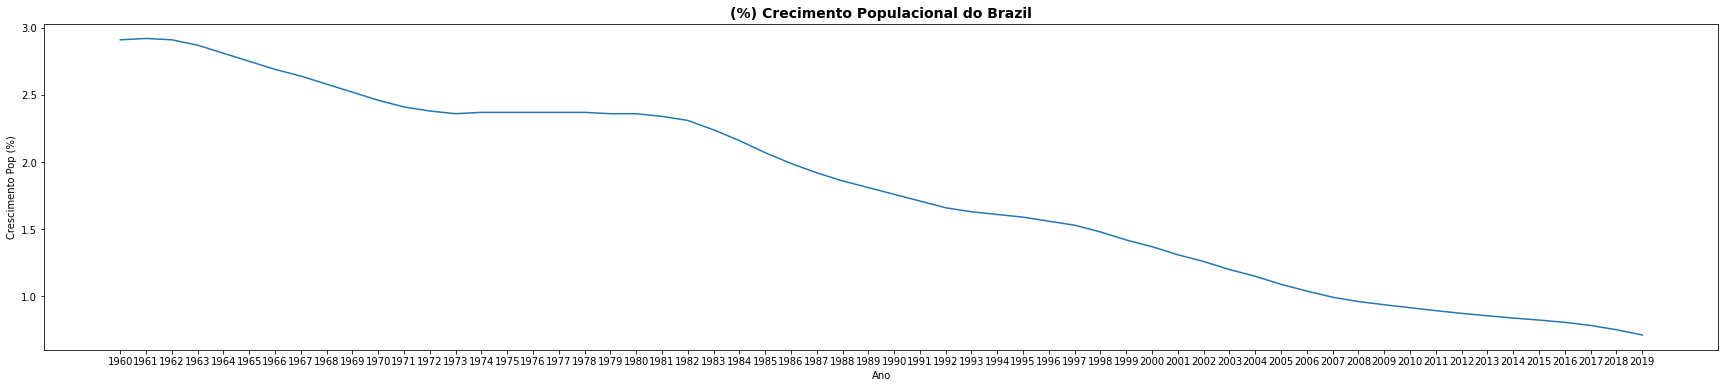

In [49]:
fig,ax=plt.subplots(figsize=(30,6))
ax.plot(population_Brazil.year,population_Brazil.Percentual,label="Crecimento Pop")
ax.set_title('(%) Crecimento Populacional do Brazil',fontsize=14, weight='bold') # configura titulo.
ax.set_xlabel("Ano") # configura rotulo no eixo X.
ax.set_ylabel("Crescimento Pop (%)") # configura rotulo no eixo Y.

# **4.** Quais os 10 países com maior numero de população urbana 2019?

In [50]:
urban_2019 = urban.sort_values(by=['2019'], ascending=False).head(10)

**Resposta: **4.**** Podemos ver no gráfico abaixo que o país com maior numero de população urbana em 2019 é a China, e o 10º país da lista é o Paquistão.

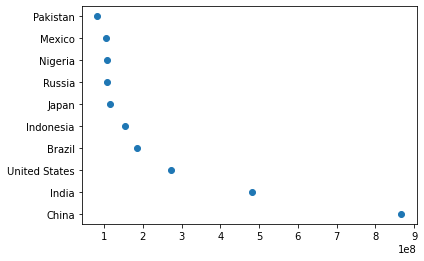

In [51]:
plt.scatter(urban_2019['2019'], urban_2019['country'])

#**5.** Qual é a média de crescimento populacional nos 10 ultimos anos,  dos países com maior a maior população urbana em 2019?

In [52]:
# Selecionando países com maior população urbana em 2109 
urban_2019 = urban_2019[['country','2019']]

In [53]:
urban_2019
urban_2019 = urban_2019.rename(columns={'2019':'Urban'})
display(urban_2019.head())

year,country,Urban
41,China,867000000.0
89,India,482000000.0
205,United States,274000000.0
26,Brazil,185000000.0
90,Indonesia,155000000.0


In [54]:
population_country = pd.melt(population, id_vars = ["country"], value_vars = population.columns, var_name = "year", value_name = 'Percentual')

In [55]:
population_country = population_country.rename(columns={'Percentual':'Crescimento'})
display(population_sel.head())

,Percentual
country,
Oman,5.183
Qatar,4.397
Equatorial Guinea,3.965
Maldives,3.908
Niger,3.855


In [56]:
Dados = pd.merge(urban_2019,population_country,how='left', on='country')

In [57]:
#Dados = Dados[Dados.year == '2019']
Dados = Dados[['country','Urban','Crescimento']][Dados.year == '2019']

**Resposta: **5.**** Podemos ver na tabela abaixo a lista de países abaixo que com maior numero de população urbana em 2019 e também sua respectiva média de crescimento nos ultimos 10 anos (2009 a 2019).

In [58]:
Dados

,country,Urban,Crescimento
59,China,867000000.0,0.226
119,India,482000000.0,0.989
179,United States,274000000.0,0.961
239,Brazil,185000000.0,0.713
299,Indonesia,155000000.0,1.070
359,Japan,115000000.0,-0.340
419,Russia,108000000.0,-0.209
479,Nigeria,107000000.0,2.540
539,Mexico,104000000.0,1.060
599,Pakistan,82100000.0,1.980


In [59]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 59 to 599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      10 non-null     object 
 1   Urban        10 non-null     float64
 2   Crescimento  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


In [64]:
#Normalizando os dados
Dados_norm = (Dados.drop(columns=['country'])-Dados.drop(columns=['country']).mean())/Dados.drop(columns=['country']).std()

Dados_norm = pd.concat([Dados[['country']], Dados_norm],axis=1)

Dados_norm

,country,Urban,Crescimento
59,China,2.489361,-0.753544
119,India,0.941276,0.100771
179,United States,0.104908,0.069420
239,Brazil,-0.252961,-0.208260
299,Indonesia,-0.373591,0.191465
359,Japan,-0.534431,-1.387282
419,Russia,-0.562578,-1.240604
479,Nigeria,-0.566599,1.837393
539,Mexico,-0.578662,0.180268
599,Pakistan,-0.666722,1.210373


In [61]:
Dados_norm.columns

Index(['country', 'Urban', 'Crescimento'], dtype='object')

# **Apresentando as curvas relativas ao crescimento populacional e urbanização, a idéia não é exibir os valores reais dos respectivas conjunto de dados, mas sim exibir os dados normalizados com objetivo de verificar seus movimentos relativos.**

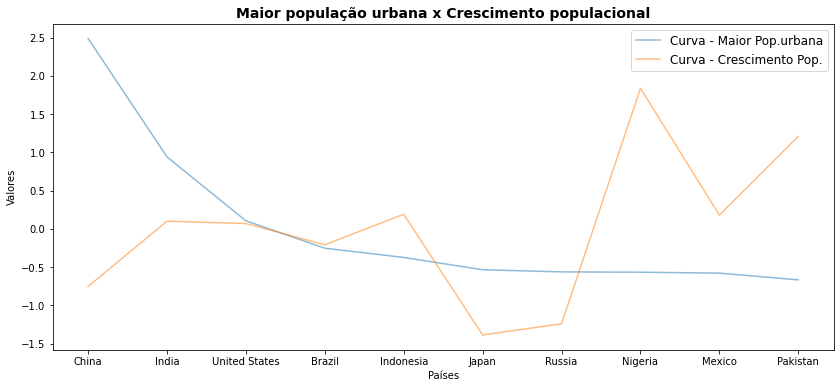

In [72]:
fig,ax=plt.subplots(figsize=(14,6))

ax.plot(Dados_norm.country, Dados_norm.Urban, label='Curva - Maior Pop.urbana', alpha=0.5)
ax.plot(Dados_norm.country, Dados_norm.Crescimento, label='Curva - Crescimento Pop.', alpha=0.5)

ax.set_title('Maior população urbana x Crescimento populacional', fontsize=14, weight='bold')
ax.set_xlabel('Países')
ax.set_ylabel('Valores')

ax.legend(fontsize=12)

plt.show()

# **Conclusão:**
Inicialmente foram necessarias conversões nos dados com obejtivo de retirar valores nulos e ajustar a tipagem para manipulações matematicas, após isso 
empregando análises exploratória dos dados (EDA) através de Python, foi possível observar a estruturação das bases e também tipagem dos campos a serem utilizados, facilitando a identificação das diversas transformações necessárias para limpar os dados não necessários, criar sub-conjuntos e fazer operações matemáticas que permitem investigar a fundo o contéudo da base, buscando as respostas necessárias e criando visualizações para melhor apresentação de resultados solicitados.
